In this notebook, we will use multiple linear regression to predict the profit of 50 startups based on “R&D Spend”, “Administration”, “Marketing Spend” and “State”.

# Step 1: Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("C://Users//Vimoney//Documents//startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


For this dataset, we have 4 independent variables(X): R&D Spend,Administration, Marketing Spend and State. The dependent variable (Y) is Profit

# Step 2: Prepare and clean dataset

In [6]:
#check null and missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There is no missing or null values in the dataset

In [5]:
#check the data types 
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

State is the categorical variable in the dataset, we have to normalize it for better analysis. 

In [8]:
#define independent and dependent variables
X, y = df[["R&D Spend", "Administration","Marketing Spend", "State"]].values, df[["Profit"]].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']]

Labels:
[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]]


In [9]:
#Encode Categorical Data
#State variable is norminal catetogory so we will use One Hot Coding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
X[:10]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

# Step 3: Split dataset into training set and test set

We split the data randomly, taking the first 70% of the data for training and keeping the rest for validation.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 35 rows
Test Set: 15 rows


Now we have the following four datasets:

X_train: The feature values we'll use to train the model 

y_train: The corresponding labels we'll use to train the model 

X_test: The feature values we'll use to validate the model 

y_test: The corresponding labels we'll use to validate the model

# Step 4: Fit Multiple Linear Regression model to training set

We create an object of the LinearRegression class and call the fit method passing the X_train and y_train.

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X_train, y_train)

LinearRegression()

# Step 5: Predict a test set

In [17]:
y_pred=reg.predict(X_test)


We can compare predictions with actual values

In [23]:
check=pd.DataFrame({"Actual": y_test.flatten(), "Predicted": np.round(y_pred, 2).flatten()})
check

,Actual,Predicted
0,103282.38,104282.76
1,144259.40,132536.88
2,146121.95,133910.85
3,77798.83,72584.77
4,191050.39,179920.93
5,105008.31,114549.31
6,81229.06,66444.43
7,97483.56,98404.97
8,110352.25,114499.83
9,166187.94,169367.51


We would be using the seaborn's regplot to better understand how the data is spread. We see how the values are spread out and get a good understanding. We can understand from the plot that the predictions were very close to the actual values that we have considered. Therefore, linear regression did a good job in giving the regression values and can be used for predictions in the future. 

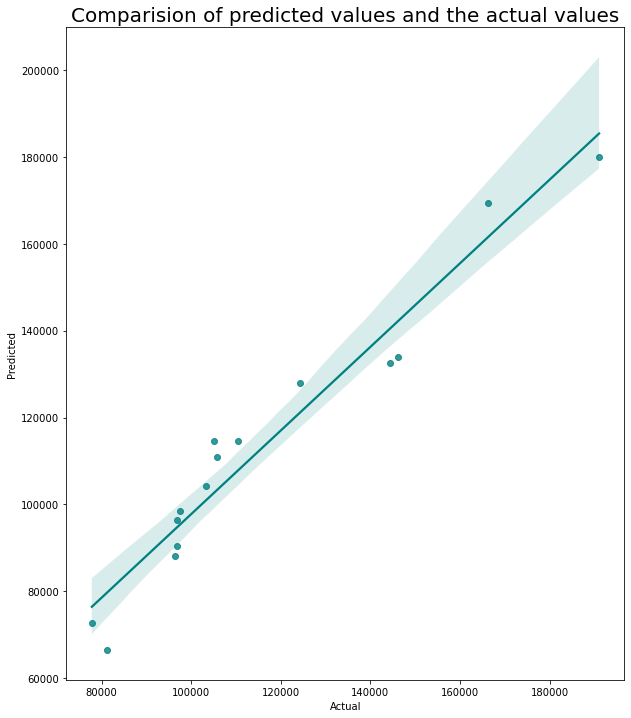

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 12))
sns.regplot(data = check, y = 'Predicted', x = 'Actual', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()


# Step 6 — Evaluate the Trained Model

Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.
You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- Mean Square Error (MSE): The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
- Root Mean Square Error (RMSE): The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- Coefficient of Determination (usually known as R-squared or R2): A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [24]:

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 61903144.402380615
RMSE: 7867.855133540565
R2: 0.9358680970046377


R2 = 0.93 it means that more than 93% of the variation in the output variable is explained by the input variables. So now we've quantified the ability of our model to predict the profit. 

# Step 7 — Make new predictions

In [33]:
# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[0.0, 0.0, 1.0, 195349.2, 236897.8, 671784.1]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = np.round(reg.predict(X_new),2)
print(f'Prediction: {result} profit')

New sample: [0.0, 0.0, 1.0, 195349.2, 236897.8, 671784.1]
Prediction: [[225187.53]] profit
